# The Collatz Conjecture

#### The setup
The [Collatz Conjecture](https://en.wikipedia.org/wiki/Collatz_conjecture) is a very simple problem that has gone unsolved since 1937. The idea is this: 

Our sequence begins with any positive integer, which we'll call $n_0$.
* If $n_0$ is even, divide it by $2$.
* If $n_0$ is odd, calculate $3n+1$

The resulting number is $n_1$. We perform the same steps on $n_1$, and we get $n_2$, $n_3$, and so on. We continue plugging the resulting numbers back into this equation as long as we like.

Using the language of modular arithmetic, we can write a function describing this behavior as follows:

$\begin{equation*}
f(n)=\begin{cases}
          \frac{n}{2} \quad &\text{if} \, n \equiv 0 \pmod 2 \\
          3n+1 \quad &\text{if} \, n \equiv 1 \pmod 2 \\
     \end{cases}
\end{equation*}$

Now a sequence can be formed by performing this operation repeatedly.

#### The Conjecture
The conjecture in question, first proposed by [Lothar Collatz](https://en.wikipedia.org/wiki/Lothar_Collatz), is that this sequence of numbers will eventually return to $1$ for every positive integer.

More specifically, we define "**total stopping time**" of an integer to be the number $k$ such that $n_k = 1$. In these terms, the conjecture states that the total stopping time of every positive integer is finite.

#### Proof?
There currently exists no *proof* that this conjecture is true - otherwise it would be called the "Collatz Theorem". While it's a simple idea, it remains incredibly difficult to make any sort of general statments about the behavior of this sequence. 

[Paul Erdős](https://en.wikipedia.org/wiki/Paul_Erd%C5%91s), one of the most prolific mathematicians of all time, said of the Collatz Conjecture: "Mathematics may not be ready for such problems."

#### What We Know
If a certain number's sequence were to disprove the Collatz Conjecture, it would have to do one of the following:
* Contain a loop of numbers (not containing $1$)
* Grow infintely

Here are some facts about this system which can stimulate our creative thinking about this conjecture:
* Arbitrarily large numbers can be observed to have finite stopping time. Indeed, $2^x$ for any natural number $x$ terminates. How do we know this? Well, We know that we can simply divide $2^x$ by $2$, $x$ times. This is certain to lead the sequence to $1$.
* Increasing the size of a number does not necessarily increase the stopping time of that number. For instance, the stopping time of $17$ is $12$, while the stopping time of $170$ is $10$.
* Computers have verified that all values up to $2^{68} \approx 2.95 \times 10^{20}$ produce a series which terminates at $1$.

### The Code Below
To help you explore this problem I've provided some simulations below, which run the algorithm described above.

1. Collatz Simulation
2. Collatz Simulation with Optimization & Graph

Simply change the input for the functions collatz() or collatz_opt() to decide the starting number.

##  1. Collatz Simulation

In [1]:
#The Collatz Conjecture states that the following algorithm will ALWAYS return to 1, for any positive integer.

def collatz(num):
    seq = []
    starting_num = num
    while num != 1:
        seq.append(int(num))
        if num % 2 == 0:
            num = num/2
        elif num % 2 == 1:
            num = 3*num+1
        else:
            print("ERROR.")
            break

    #"total stopping time" refers to how many times the algorithm had to be applied to return to 1.
    print("The total stopping time of " + str(starting_num) + " is " + str(len(seq)))
    
    #since our while loop breaks before we get to 1, we just do it manually at the end of every sequence
    seq.append(1)
    print (seq)


collatz(170)


The total stopping time of 170 is 10
[170, 85, 256, 128, 64, 32, 16, 8, 4, 2, 1]


##  2. Collatz Simulation with Optimization & Graph

The total stopping time (using optimization) of 49 is 17
The maximum value in the sequence was 74
[49, 74, 37, 56, 28, 14, 7, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]


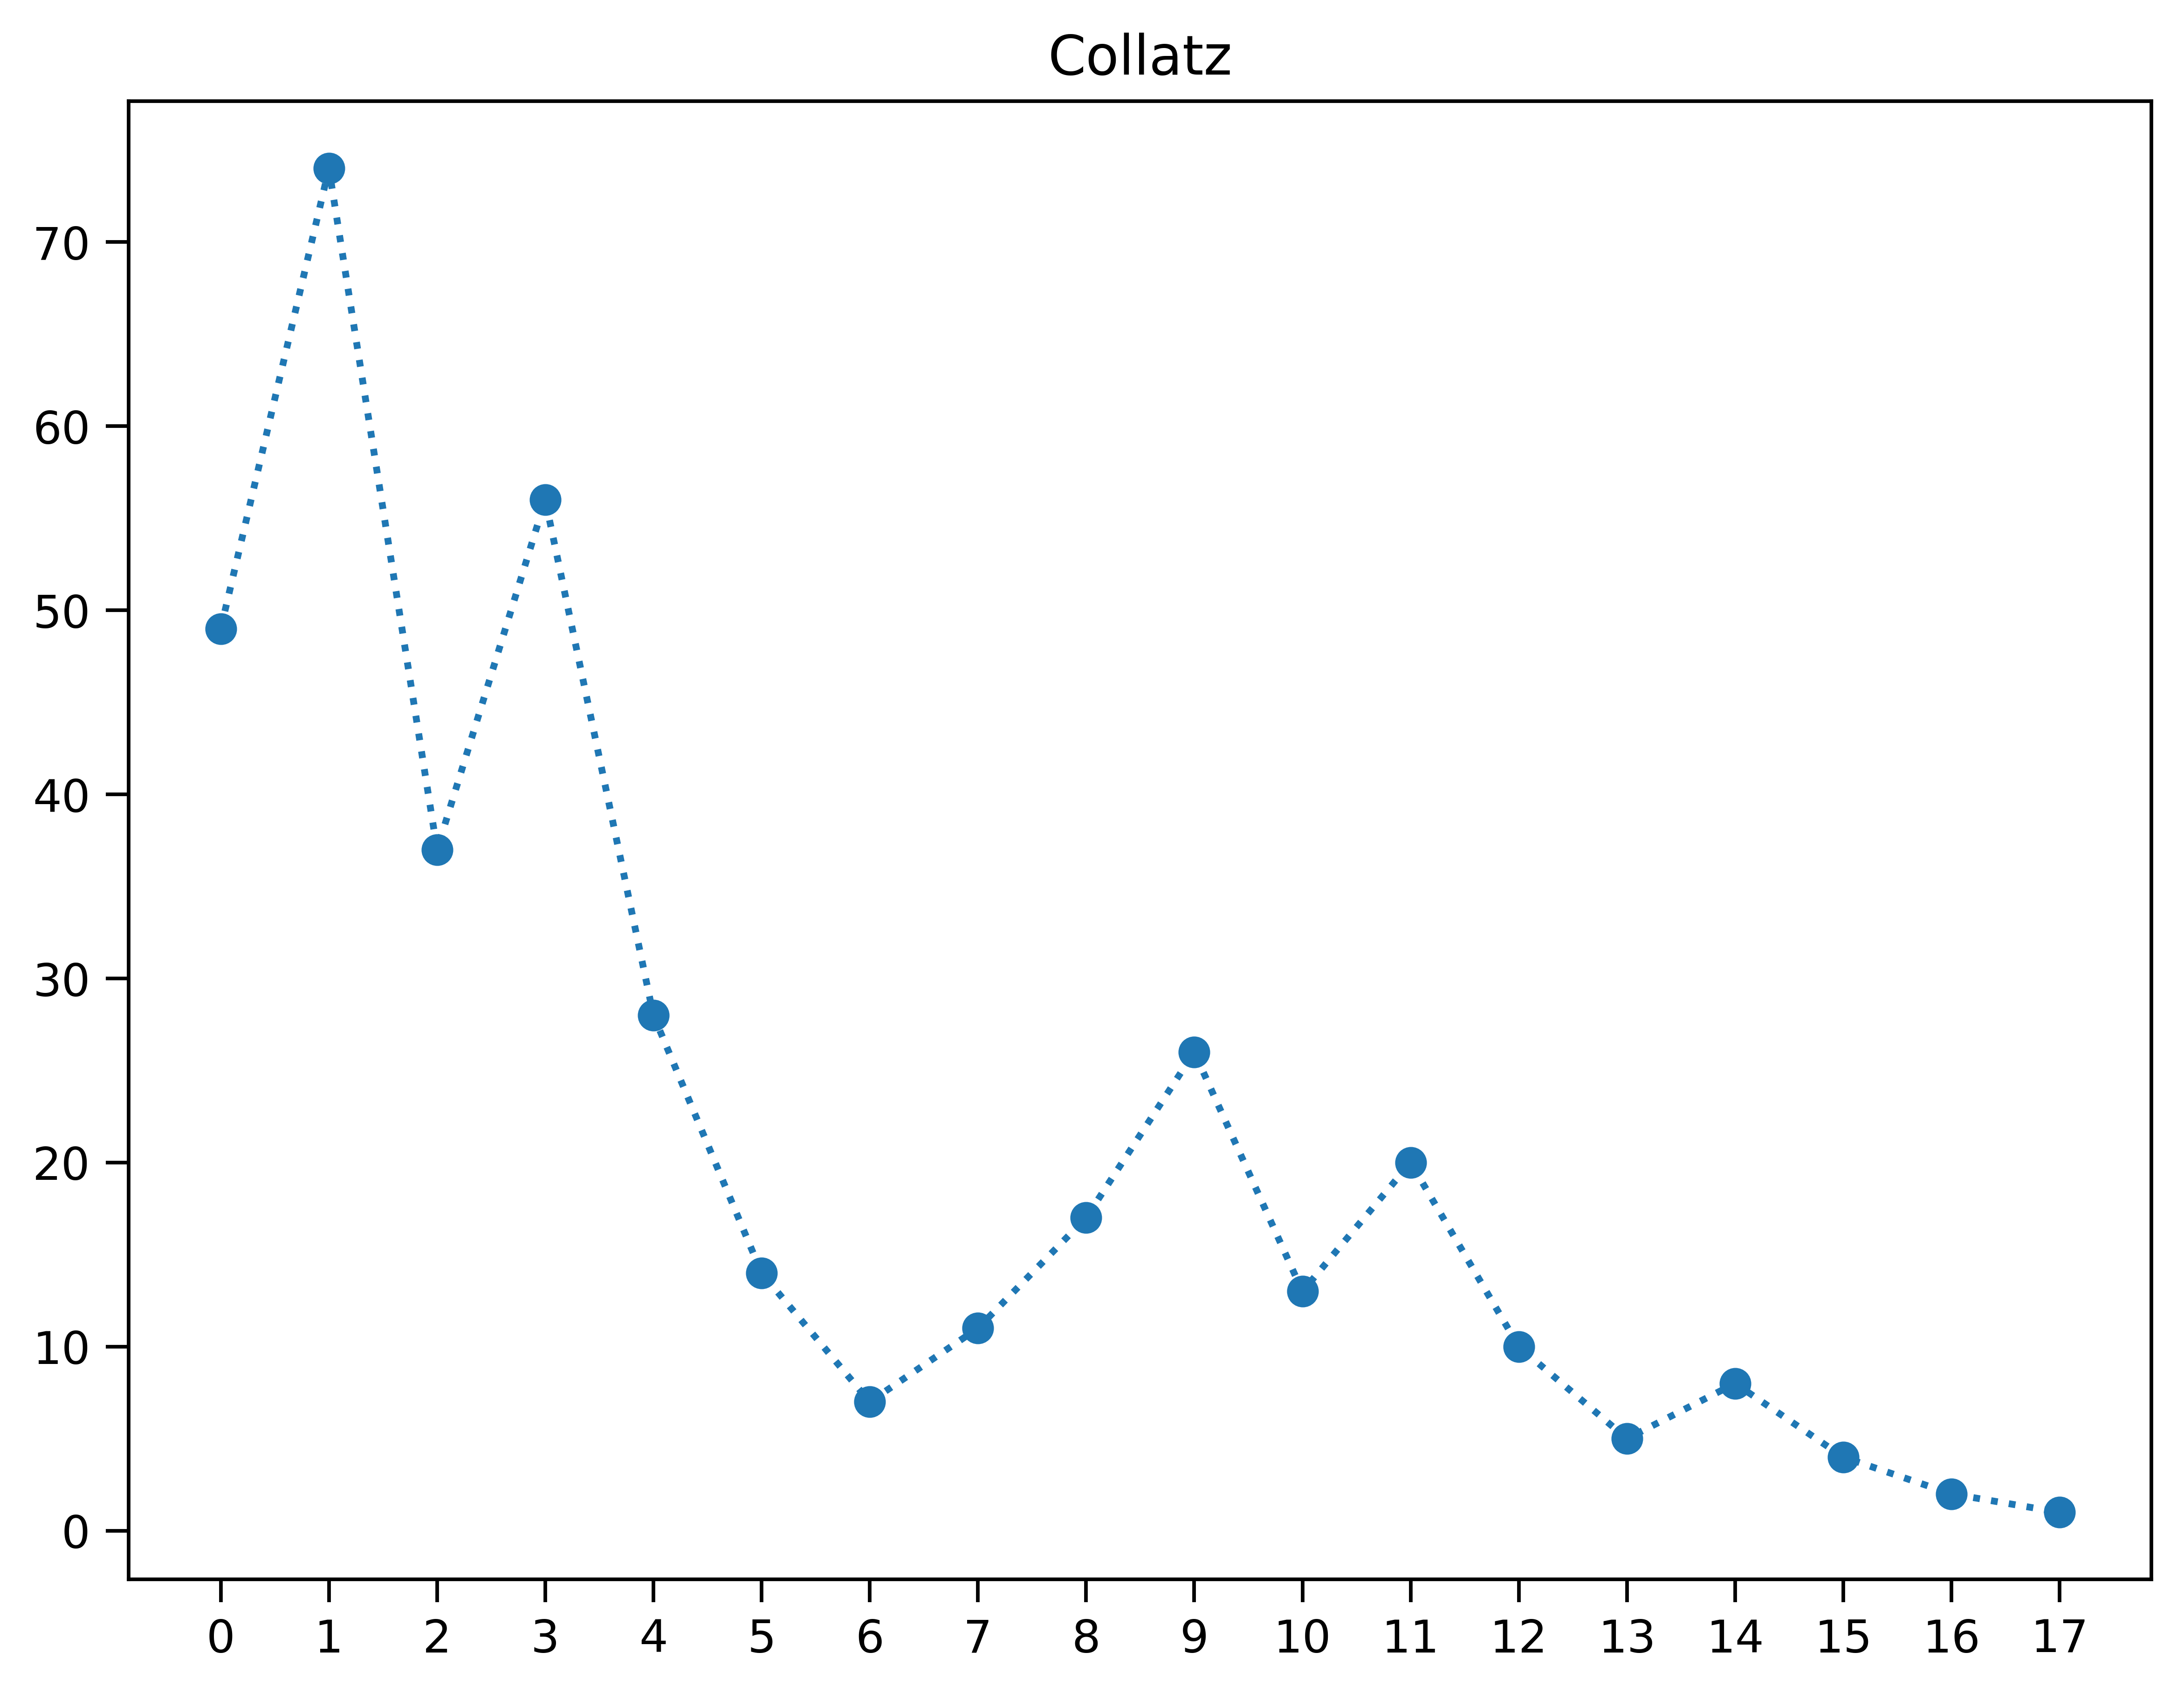

In [18]:
#This is the same as above, but provides a quicker computation.
#The only difference is that for odd numbers, we perform the single operation (3*n+1)/2, rather than making this 2 steps.
#The graph that follows the calculation plots each value in the sequence

import matplotlib.pyplot as plt
import math as m

%matplotlib inline

def collatz_opt(num):
    global seq
    starting_num = num
    while num != 1:
        seq.append(int(num))
        if num % 2 == 0:
            num = num/2
        elif num % 2 == 1:
            num = (3*num+1)/2
        else:
            print("ERROR.")
            break

    #"total stopping time" refers to how many times the algorithm had to be applied to return to zero.
    print("The total stopping time (using optimization) of " + str(starting_num) + " is " + str(len(seq)))
    
    #since our while loop breaks before we add 1, we just do it manually at the end of every sequence
    seq.append(1)
    return(seq)

seq = []

collatz_opt(49)

print("The maximum value in the sequence was " + str(max(seq)))
print(seq)


#Here we begin our plot
x = list(range(0,len(seq)))
y = seq



plt.figure(figsize=(8,6), dpi=700)
plt.title("Collatz")
plt.tick_params(length=5)

#Make individual ticks for each number, unless there's too many (ticks become unreadably squished together after about 40)
if len(seq) < 40:
    plt.xticks(range(0,len(seq)))
else:
    pass


plt.plot(x,y, linestyle='dotted', marker='o')